<a href="https://colab.research.google.com/github/IsaacKosloski/ControlTheory/blob/main/CS2_1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Obtendo função de transferência em cascata, em paralelo e com realimentação (de malha fechada) com Python.

###$G_1(s) = \frac{num1}{den1} , G_2(s) = \frac{num2}{den2}$

Pag. 17

In [2]:
!pip install control

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control as ct
import sympy as sp

#Plotando gráfico

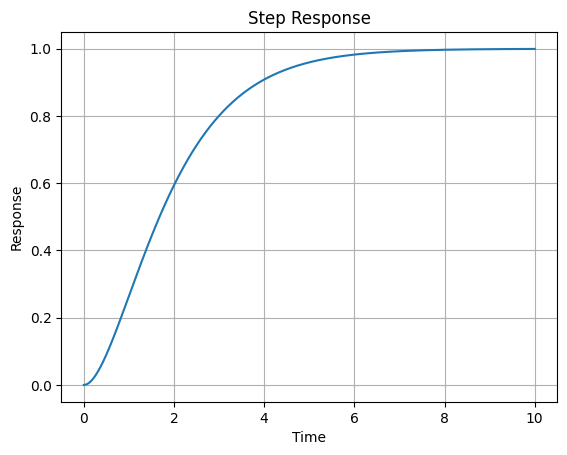

In [5]:
# Define the system parameters
numerator = [1]
denominator = [1, 2, 1]  # Example: s^2 + 2s + 1

# Create a transfer function representation of the system
system = signal.TransferFunction(numerator, denominator)

# Set up simulation parameters
time_span = np.linspace(0, 10, 1000)  # Time span from 0 to 10 seconds
t, y = signal.step(system, T=time_span)  # Perform step response simulation

# Plot the step response
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Step Response')
plt.grid(True)
plt.show()


##Em serie (ou cascata)


     1      
────────────
 2          
s  + 5⋅s + 6




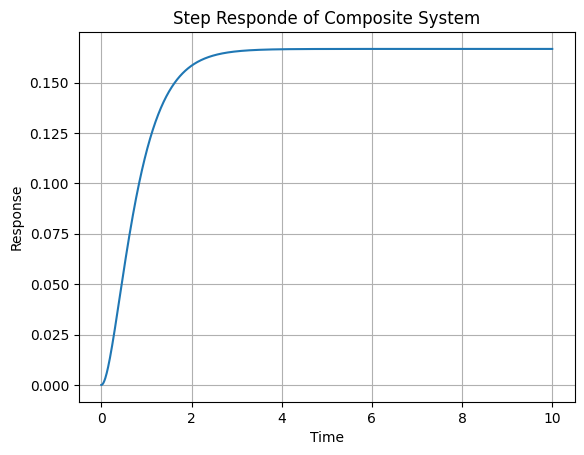

In [23]:
num1 = [1]  # Numerator coefficients of the first transfer function
den1 = [1, 2]  # Denominator coefficients of the first transfer function
system1 = ct.TransferFunction(num1, den1) # Create a transfer function representation of the first system
num2 = [1]  # Numerator coefficients of the second transfer function
den2 = [1, 3]  # Denominator coefficients of the second transfer function
system2 = ct.TransferFunction(num2, den2) # Create a transfer function representation of the second system

composite_system = ct.series(system1,system2) # Create a composite system by connecting systems in series
numerator, denominator = ct.tfdata(composite_system) # Convert the transfer function to state-space representation
s = sp.symbols('s') # Create symbolic variables
symbolic_tf = sp.Poly(numerator[0][0], s) / sp.Poly(denominator[0][0], s) # Define the symbolic transfer function

print(sp.pretty(symbolic_tf, use_unicode=True)) # Print the symbolic transfer function as a fraction
print("\n")

# Set up simulation parameters
time_span = np.linspace(0,10, 1000)
t, y = ct.step_response(composite_system, time_span) # Perform step response simulation

#Plot the step responde
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Step Responde of Composite System')
plt.grid(True)
plt.show()

##Em paralelo

  2⋅s + 5   
────────────
 2          
s  + 5⋅s + 6




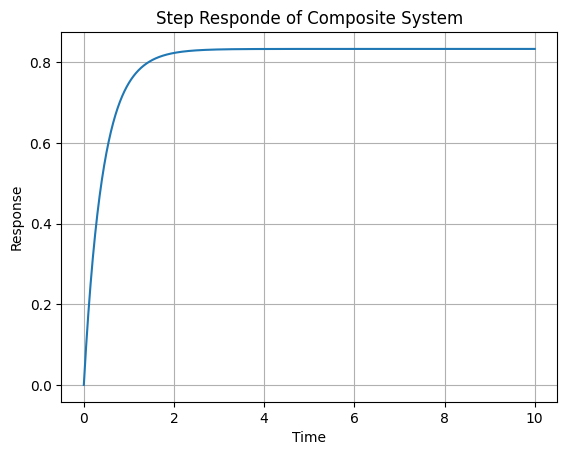

In [24]:
num1 = [1]  # Numerator coefficients of the first transfer function
den1 = [1, 2]  # Denominator coefficients of the first transfer function
system1 = ct.TransferFunction(num1, den1) # Create a transfer function representation of the first system
num2 = [1]  # Numerator coefficients of the second transfer function
den2 = [1, 3]  # Denominator coefficients of the second transfer function
system2 = ct.TransferFunction(num2, den2) # Create a transfer function representation of the second system

composite_system = ct.parallel(system1,system2) # Create a composite system by connecting systems in parallel
numerator, denominator = ct.tfdata(composite_system) # Convert the transfer function to state-space representation
s = sp.symbols('s') # Create symbolic variables
symbolic_tf = sp.Poly(numerator[0][0], s) / sp.Poly(denominator[0][0], s) # Define the symbolic transfer function

print(sp.pretty(symbolic_tf, use_unicode=True)) # Print the symbolic transfer function as a fraction
print("\n")

# Set up simulation parameters
time_span = np.linspace(0,10, 1000)
t, y = ct.step_response(composite_system, time_span) # Perform step response simulation

#Plot the step responde
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Step Responde of Composite System')
plt.grid(True)
plt.show()

##Feedback

In [ ]:
num1 = [1]  # Numerator coefficients of the first transfer function
den1 = [1, 2]  # Denominator coefficients of the first transfer function
system1 = ct.TransferFunction(num1, den1) # Create a transfer function representation of the first system
num2 = [1]  # Numerator coefficients of the second transfer function
den2 = [1, 3]  # Denominator coefficients of the second transfer function
system2 = ct.TransferFunction(num2, den2) # Create a transfer function representation of the second system

composite_system = ct.feedback(system1,system2) # Create a composite system by connecting systems in feedback
numerator, denominator = ct.tfdata(composite_system) # Convert the transfer function to state-space representation
s = sp.symbols('s') # Create symbolic variables
symbolic_tf = sp.Poly(numerator[0][0], s) / sp.Poly(denominator[0][0], s) # Define the symbolic transfer function

print(sp.pretty(symbolic_tf, use_unicode=True)) # Print the symbolic transfer function as a fraction
print("\n")

# Set up simulation parameters
time_span = np.linspace(0,10, 1000)
t, y = ct.step_response(composite_system, time_span) # Perform step response simulation

#Plot the step response
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Step Responde of Composite System')
plt.grid(True)
plt.show()

#Programa 2.1
pag.18


In [30]:
#programa 2.1 em Python

num1 = [10]
den1 = [1, 2, 10]
num2 = [5]
den2 = [1, 5]

#Create a transfer function representation of the systems
system1 = ct.TransferFunction(num1, den1)
system2 = ct.TransferFunction(num2, den2)

# Series connection
# Create a composite system by connecting systems in series
composite_systemSC = ct.series(system1, system2)
# Convert the transfer function to a state-space representation
numeratorSC, denominatorSC = ct.tfdata(composite_systemSC)
#create a symbolic variable
s = sp.symbols('s')
#Define the symbolic transfer function
symbolic_tfSC = sp.Poly(numeratorSC[0][0], s) / sp.Poly(denominatorSC[0][0], s)
print(sp.pretty(symbolic_tfSC, use_unicode=True))
print("\n")

# Parallel connection
# Create a composite system by connecting systems in parallel
composite_systemPC = ct.parallel(system1, system2)
# Convert the transfer function to a state-space representation
numeratorPC, denominatorPC = ct.tfdata(composite_systemPC)
#create a symbolic variable
s = sp.symbols('s')
#Define the symbolic transfer function
symbolic_tfPC = sp.Poly(numeratorPC[0][0], s) / sp.Poly(denominatorPC[0][0], s)
print(sp.pretty(symbolic_tfPC, use_unicode=True))
print("\n")

# Feedback connection
# Create a composite system by connecting systems in feedback
composite_systemFC = ct.feedback(system1, system2)
# Convert the transfer function to a state-space representation
numeratorFC, denominatorFC = ct.tfdata(composite_systemFC)
#create a symbolic variable
s = sp.symbols('s')
#Define the symbolic transfer function
symbolic_tfFC = sp.Poly(numeratorFC[0][0], s) / sp.Poly(denominatorFC[0][0], s)
print(sp.pretty(symbolic_tfFC, use_unicode=True))
print("\n")


          50         
─────────────────────
 3      2            
s  + 7⋅s  + 20⋅s + 50


     2               
  5⋅s  + 20⋅s + 100  
─────────────────────
 3      2            
s  + 7⋅s  + 20⋅s + 50


      10⋅s + 50       
──────────────────────
 3      2             
s  + 7⋅s  + 20⋅s + 100




#Gráfico para o programa 2.1

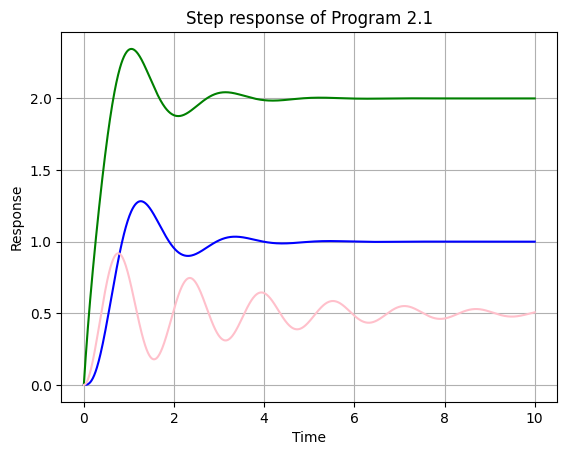

In [37]:
# Set up simulation parameters
time_span = np.linspace(0, 10, 1000)
# Perfom step responde simulation
ts, ys = ct.step_response(composite_systemSC, time_span)
tp, yp = ct.step_response(composite_systemPC, time_span)
tf, yf = ct.step_response(composite_systemFC, time_span)

# Plot the step responses
plt.plot(ts, ys, color='blue')
plt.plot(tp, yp, color='green')
plt.plot(tf, yf, color='pink')

plt.xlabel('Time')
plt.ylabel('Response')
plt.title('Step response of Program 2.1')
plt.grid(True)
plt.show()